## Introduction
In and around Milpitas California, there are very few Indian Restuarant which serves pure vegetarian food. The problem often faced by the residents and customers is that, the restuarants are very crowded and operates limited time. the other problem faced by customers are delayed home delivery. the food often comes cold and manier times the delivery is cancelled due to delay or cold food. in my capstone project i would like to seek answers for the below questions, I have used Anand Adiyar Bhavan (AAB) for capstone porject.

1. How many Indian restuarants are there in and around Milipitas
2. What is the peak and off peak crowd
3. What is the rating of the hotel
4. Typical Delivery time 
5. Best alternative place to open branch of AAB


## Data Source

We planned to use the data set provided from Foursuare, the radious used 1000 for search capability. We intend to use Map functionality to find near by opportunity to open AAb brach.
The Key data will be
Venue
Radius
Name 
resemblence


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'AJ3EMNVVIQJBAAMUJAVBJYNI3D51JUZXZ5MOCNQH4WAMBCCA' # your Foursquare ID
CLIENT_SECRET = 'N4IOP4BKCEQOFMHEDH3ILAFZMABFNRNK5GGOJ3L3WBPOYBOS' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AJ3EMNVVIQJBAAMUJAVBJYNI3D51JUZXZ5MOCNQH4WAMBCCA
CLIENT_SECRET:N4IOP4BKCEQOFMHEDH3ILAFZMABFNRNK5GGOJ3L3WBPOYBOS


In [31]:
address = 'Milpitas, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.4282724 -121.9066238


In [32]:
search_query = 'Indian'
radius = 1000
print(search_query + ' .... OK!')

Indian .... OK!


In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AJ3EMNVVIQJBAAMUJAVBJYNI3D51JUZXZ5MOCNQH4WAMBCCA&client_secret=N4IOP4BKCEQOFMHEDH3ILAFZMABFNRNK5GGOJ3L3WBPOYBOS&ll=37.4282724,-121.9066238&v=20180604&query=Indian&radius=1000&limit=30'

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeb8559e826ac00210273a5'},
 'response': {'venue': {'id': '55d30680498e12fc85669e56',
   'name': 'Indian Street cafe',
   'contact': {'phone': '6692465034',
    'formattedPhone': '(669) 246-5034',
    'twitter': 'indian_cafe',
    'facebook': '417639811735998',
    'facebookUsername': 'indianstreetcafe',
    'facebookName': 'Indian Street Cafe'},
   'location': {'address': '927 E Arques Ave',
    'crossStreet': 'Wolfe',
    'lat': 37.381247,
    'lng': -122.007581,
    'labeledLatLngs': [{'label': 'display',
      'lat': 37.381247,
      'lng': -122.007581},
     {'label': 'entrance', 'lat': 37.381122, 'lng': -122.007716}],
    'postalCode': '94085',
    'cc': 'US',
    'city': 'Sunnyvale',
    'state': 'CA',
    'country': 'United States',
    'formattedAddress': ['927 E Arques Ave (Wolfe)',
     'Sunnyvale, CA 94085',
     'United States']},
   'canonicalUrl': 'https://foursquare.com/v/indian-street-cafe/55d30680498e12fc85669e56',
   'categories':

In [40]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

KeyError: 'venues'

In [35]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Indian Street cafe,Indian Restaurant,927 E Arques Ave,Wolfe,37.381247,-122.007581,"[{'label': 'display', 'lat': 37.381247, 'lng':...",128,94085,US,Sunnyvale,CA,United States,"[927 E Arques Ave (Wolfe), Sunnyvale, CA 94085...",55d30680498e12fc85669e56


In [36]:
dataframe_filtered.name

0    Indian Street cafe
Name: name, dtype: object

In [1]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the AAB

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

NameError: name 'folium' is not defined

In [37]:
venue_id = '55d30680498e12fc85669e56' # ID of Indian Street
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/55d30680498e12fc85669e56?client_id=AJ3EMNVVIQJBAAMUJAVBJYNI3D51JUZXZ5MOCNQH4WAMBCCA&client_secret=N4IOP4BKCEQOFMHEDH3ILAFZMABFNRNK5GGOJ3L3WBPOYBOS&v=20180604'

In [20]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])


{'id': '55d30680498e12fc85669e56',
 'name': 'Indian Street cafe',
 'contact': {'phone': '6692465034',
  'formattedPhone': '(669) 246-5034',
  'twitter': 'indian_cafe',
  'facebook': '417639811735998',
  'facebookUsername': 'indianstreetcafe',
  'facebookName': 'Indian Street Cafe'},
 'location': {'address': '927 E Arques Ave',
  'crossStreet': 'Wolfe',
  'lat': 37.381247,
  'lng': -122.007581,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.381247,
    'lng': -122.007581},
   {'label': 'entrance', 'lat': 37.381122, 'lng': -122.007716}],
  'postalCode': '94085',
  'cc': 'US',
  'city': 'Sunnyvale',
  'state': 'CA',
  'country': 'United States',
  'formattedAddress': ['927 E Arques Ave (Wolfe)',
   'Sunnyvale, CA 94085',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/indian-street-cafe/55d30680498e12fc85669e56',
 'categories': [{'id': '4bf58dd8d48988d10f941735',
   'name': 'Indian Restaurant',
   'pluralName': 'Indian Restaurants',
   'shortName': 'Indian',
   '

In [38]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.3


## Since we had limited data aviable from foursquare, we downloaded he postal code data of California state from https://www.zipcodestogo.com/California/. 

In [2]:
import pandas as pd
dfzip = pd.read_csv (r'C:\Users\vijay.k\Desktop\Final week 2 project\Californiazip.csv') 
print (dfzip)


      Zip Code              City       County Zip Code Map
0        90001       Los Angeles  Los Angeles     View Map
1        90002       Los Angeles  Los Angeles     View Map
2        90003       Los Angeles  Los Angeles     View Map
3        90004       Los Angeles  Los Angeles     View Map
4        90005       Los Angeles  Los Angeles     View Map
...        ...               ...          ...          ...
2652     96157  South Lake Tahoe    El Dorado     View Map
2653     96158  South Lake Tahoe    El Dorado     View Map
2654     96160           Truckee       Nevada     View Map
2655     96161           Truckee       Nevada     View Map
2656     96162           Truckee       Nevada     View Map

[2657 rows x 4 columns]


The Objective of this exercise to find two complexes in milpitas where there are Indian resutrants are avaiable but there is space to start AAB branch. we obtained the rating of these two rest to find how close they are.


In [3]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [8,6,5,3,4,7,6,8,9,3,4,6,2]

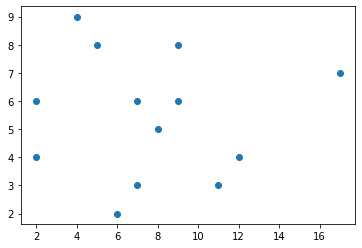

In [6]:
import matplotlib.pyplot as plt
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [8,6,5,3,4,7,6,8,9,3,4,6,2]
plt.scatter(x, y)
plt.show()